In [0]:
  import numpy
  from keras.models import Sequential
  from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
  from keras.layers.convolutional import Conv2D, MaxPooling2D
  from keras.constraints import maxnorm
  from keras.utils import np_utils
  import cv2
  from google.colab.patches import cv2_imshow
  from keras.datasets import cifar100
  from keras.preprocessing.image import img_to_array, load_img

In [0]:
load_labels=['Beaver','Dolphin','Otter','Seal','Whale',
'Aquarium', 'fish',	'Flatfish',	'Ray',	'Shark','Trout',
'Orchids','Poppies',	'Roses',	'Sunflowers',	'Tulips',
'Bottles',	'Bowls',	'Cans',	'Cups',	'Plates',
'Apples',	'Mushrooms',	'Oranges',	'Pears',	'Sweet peppers',
'Clok',	'Computer keyboard',	'Lamp',	'Telephone',	'Television',
'Bed',	'Chair',	'Couch',	'Table',	'Wardrobe',
'Bee',	'Beetle',	'Butterfly',	'Caterpillar',	'Cockroach',
'Bear',	'Leopard',	'Lion',	'Tiger',	'Wolf',
'Bridge',	'Castle',	'House',	'Road',	'Skyscraper',
'Cloud',	'Forest',	'Mountain',	'Plain',	'Sea',
'Camel',	'Cattle',	'Chimpanzee',	'Elephant',	'Kangaroo',
'Fox',	'Porcupine',	'Possum',	'Raccoon',	'Skunk',
'Crab',	'Lobster',	'Snail',	'Spider',	'Worm',
'Baby',	'Boy',	'Girl'	'Man',	'Woman',
'Crocodile',	'Dinosaur',	'Lizard',	'Snake',	'Turtle',
'Hamster',	'Mouse',	'Rabbit',	'Shrew',	'Squirrel',
'Maple',	'Oak',	'Palm',	'Pine',	'Willow',
'Bicycle',	'Bus',	'Motorcycle',	'Pickup truck',	'Train',
'Lawn-mower',	'Rocket',	'Streetcar',	'Tank',	'Tractor']

In [0]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(class_num))
model.add(Activation('softmax'))

epochs = 25
optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

In [7]:
numpy.random.seed(21)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 404s 8ms/step - loss: 3.8577 - accuracy: 0.1173 - val_loss: 3.5441 - val_accuracy: 0.1675
Epoch 2/10
50000/50000 [==============================] - 406s 8ms/step - loss: 3.1642 - accuracy: 0.2231 - val_loss: 2.9225 - val_accuracy: 0.2737
Epoch 3/10
50000/50000 [==============================] - 405s 8ms/step - loss: 2.7505 - accuracy: 0.3021 - val_loss: 2.5581 - val_accuracy: 0.3376
Epoch 4/10
50000/50000 [==============================] - 401s 8ms/step - loss: 2.4969 - accuracy: 0.3529 - val_loss: 2.4073 - val_accuracy: 0.3717
Epoch 5/10
50000/50000 [==============================] - 405s 8ms/step - loss: 2.3449 - accuracy: 0.3822 - val_loss: 2.3626 - val_accuracy: 0.3854
Epoch 6/10
50000/50000 [==============================] - 406s 8ms/step - loss: 2.2277 - accuracy: 0.4066 - val_loss: 2.1309 - val_accuracy: 0.4414
Epoch 7/10
50000/50000 [==============================] - 406s

In [118]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 47.16%


In [0]:
def get_img_vec(img_path):
    img = load_img(img_path, target_size=(32, 32))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img_vec= model.predict(img)
    return img_vec

In [0]:
def predictions_display(img_path,img_vec):
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  print('i guess it is Computer Desktop')
  count=-1
  for i in img_vec[0]:
    count=count+1
    if i > 0.0:
      print('i guess it is '+load_labels[count])

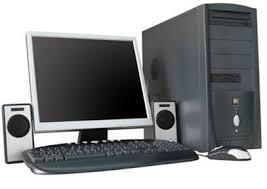

i guess it is Computer Desktop
i guess it is Oak


In [122]:
predictions_display('Computer.jpg',get_img_vec('Computer.jpg'))

In [0]:
# For saving and loading the model
import joblib
filename = 'drive/My Drive/image_recognition_model_cifar100.sav'
joblib.dump(model, filename)
model = joblib.load(filename)